In [1]:
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df=yf.download('ko',start='2010-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,28.790001,28.875000,28.465000,28.500000,19.068237,10848800
2010-01-04,28.580000,28.610001,28.450001,28.520000,19.081617,13870400
2010-01-05,28.424999,28.495001,28.070000,28.174999,18.850786,23172400
2010-01-06,28.174999,28.219999,27.990000,28.165001,18.844099,19264600
2010-01-07,28.165001,28.184999,27.875000,28.094999,18.797268,13234600
...,...,...,...,...,...,...
2023-01-24,60.080002,63.259998,59.799999,60.549999,60.549999,10103300
2023-01-25,60.200001,60.939999,59.889999,60.930000,60.930000,11265800
2023-01-26,60.810001,61.099998,60.570000,60.810001,60.810001,11884800


In [3]:
def indicators(df):
    df['SMA_200']=ta.trend.sma_indicator(df.Close,window=200)
    df['stoch_k']=ta.momentum.stochrsi_k(df.Close,window=10)
    df.dropna(inplace=True)

In [4]:
indicators(df)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch_k
Date,,,,,,,,
2010-10-15,29.980000,29.990000,29.870001,29.969999,20.541334,19697600,27.35410,0.809353
2010-10-18,29.905001,30.000000,29.900000,30.000000,20.561905,19661800,27.36160,0.809606
2010-10-19,29.980000,30.235001,29.915001,30.170000,20.678421,35052800,27.36985,0.891335
2010-10-20,30.184999,30.840000,30.184999,30.575001,20.956003,32398000,27.38185,0.958474
2010-10-21,30.504999,30.875000,30.504999,30.735001,21.065668,23266400,27.39470,1.000000
...,...,...,...,...,...,...,...,...
2023-01-24,60.080002,63.259998,59.799999,60.549999,60.549999,10103300,61.91565,0.475737
2023-01-25,60.200001,60.939999,59.889999,60.930000,60.930000,11265800,61.90310,0.744385
2023-01-26,60.810001,61.099998,60.570000,60.810001,60.810001,11884800,61.88800,0.921329


In [6]:
df['Buy']=((df.Close>df.SMA_200)&(df.stoch_k<0.05))
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,stoch_k,Buy
Date,,,,,,,,,
2010-10-15,29.980000,29.990000,29.870001,29.969999,20.541334,19697600,27.35410,0.809353,False
2010-10-18,29.905001,30.000000,29.900000,30.000000,20.561905,19661800,27.36160,0.809606,False
2010-10-19,29.980000,30.235001,29.915001,30.170000,20.678421,35052800,27.36985,0.891335,False
2010-10-20,30.184999,30.840000,30.184999,30.575001,20.956003,32398000,27.38185,0.958474,False
2010-10-21,30.504999,30.875000,30.504999,30.735001,21.065668,23266400,27.39470,1.000000,False
...,...,...,...,...,...,...,...,...,...
2023-01-24,60.080002,63.259998,59.799999,60.549999,60.549999,10103300,61.91565,0.475737,False
2023-01-25,60.200001,60.939999,59.889999,60.930000,60.930000,11265800,61.90310,0.744385,False
2023-01-26,60.810001,61.099998,60.570000,60.810001,60.810001,11884800,61.88800,0.921329,False


In [7]:
buydates,selldates=[],[]
buys,sells=[],[]
last_selldate=pd.to_datetime('1900-01-01')
buydate=pd.to_datetime('1900-01-01')
for row in range(len(df)):
    if len(selldates)>0:
        last_selldate=selldates[-1]
    if df.iloc[row].Buy:
        buyprice=df.iloc[row].Close*0.97
        k=1
        while True:
            if buyprice >=df.iloc[row+k].Low:
                buydate=df.iloc[row+k].name
                break
            elif k > 10:
                break
            else:
                k+=1
        if buydate>last_selldate:
            buydates.append(buydate)
            buys.append(buyprice)
            for j in range(1,11):
                if df.iloc[row+k+j].Close>buyprice:
                    sellprice=df.iloc[row+k+j+1].Open
                    selldate=df.iloc[row+k+j+1].name
                    sells.append(sellprice)
                    selldates.append(selldate)
                    break
                elif j==10:
                    sellprice=df.iloc[row+k+j+1].Open
                    selldate=df.iloc[row+k+j+1].name
                    sells.append(sellprice)
                    selldates.append(selldate)

In [8]:
buydates

[Timestamp('2011-08-05 00:00:00'),
 Timestamp('2011-09-22 00:00:00'),
 Timestamp('2011-10-03 00:00:00'),
 Timestamp('2012-01-13 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-04 00:00:00'),
 Timestamp('2012-08-23 00:00:00'),
 Timestamp('2012-10-23 00:00:00'),
 Timestamp('2013-05-30 00:00:00'),
 Timestamp('2013-08-21 00:00:00'),
 Timestamp('2013-12-17 00:00:00'),
 Timestamp('2014-07-22 00:00:00'),
 Timestamp('2014-07-30 00:00:00'),
 Timestamp('2014-10-21 00:00:00'),
 Timestamp('2014-12-09 00:00:00'),
 Timestamp('2015-11-09 00:00:00'),
 Timestamp('2016-01-15 00:00:00'),
 Timestamp('2016-04-20 00:00:00'),
 Timestamp('2016-06-27 00:00:00'),
 Timestamp('2017-09-27 00:00:00'),
 Timestamp('2018-02-05 00:00:00'),
 Timestamp('2018-12-24 00:00:00'),
 Timestamp('2020-02-27 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-09-28 00:00:00'),
 Timestamp('2021-10-04 00:00:00'),
 Timestamp('2021-11-26 00:00:00'),
 Timestamp('2022-01-24 00:00:00'),
 Timestamp('2022-05-

In [9]:
selldates

[Timestamp('2011-08-09 00:00:00'),
 Timestamp('2011-09-26 00:00:00'),
 Timestamp('2011-10-06 00:00:00'),
 Timestamp('2012-01-18 00:00:00'),
 Timestamp('2012-05-22 00:00:00'),
 Timestamp('2012-06-06 00:00:00'),
 Timestamp('2012-08-27 00:00:00'),
 Timestamp('2012-10-25 00:00:00'),
 Timestamp('2013-06-05 00:00:00'),
 Timestamp('2013-08-26 00:00:00'),
 Timestamp('2013-12-19 00:00:00'),
 Timestamp('2014-07-24 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-11-05 00:00:00'),
 Timestamp('2014-12-19 00:00:00'),
 Timestamp('2015-11-11 00:00:00'),
 Timestamp('2016-01-20 00:00:00'),
 Timestamp('2016-04-26 00:00:00'),
 Timestamp('2016-06-29 00:00:00'),
 Timestamp('2017-09-29 00:00:00'),
 Timestamp('2018-02-21 00:00:00'),
 Timestamp('2018-12-27 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2021-01-27 00:00:00'),
 Timestamp('2021-09-30 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2022-01-26 00:00:00'),
 Timestamp('2022-05-

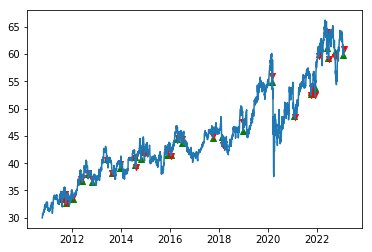

In [10]:
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index,df.loc[buydates].Close,marker='^',c='g')
plt.scatter(df.loc[selldates].index,df.loc[selldates].Close,marker='v',c='r')

In [11]:
[(sell-buy)/buy for sell,buy in zip(sells,buys)]

[0.011714180665412955,
 0.01466578599728281,
 0.008755745830529333,
 0.008942267529812276,
 0.0072919950402575,
 0.00718570845162958,
 0.0090767425671504,
 0.010713518825069912,
 0.01018731228887707,
 0.0066737690050207715,
 0.02809842672062623,
 0.0068441929048278765,
 0.005513158832905067,
 0.008749643717646022,
 0.005806342616636665,
 0.011867831722308882,
 0.009734401171280709,
 0.005848730276894131,
 0.016727120090034363,
 0.002980323085451782,
 -0.044458346552888384,
 0.005961737071223848,
 0.015893467661077198,
 -0.0023345057453152697,
 0.013955414531069502,
 0.006513655790941597,
 -0.011666418592387966,
 0.014636645293408832,
 0.027659186548680943,
 -0.015573884246771336,
 0.0018992965632733164,
 -0.0022209695274336473]

In [12]:
profits=pd.DataFrame([(sell-buy)/buy for sell,buy in zip(sells,buys)])
profits

,0
0,0.011714
1,0.014666
2,0.008756
3,0.008942
4,0.007292
5,0.007186
6,0.009077
7,0.010714
8,0.010187
9,0.006674


In [13]:
(profits+1).cumprod()

,0
0,1.011714
1,1.026552
2,1.035540
3,1.044800
4,1.052419
5,1.059981
6,1.069602
7,1.081061
8,1.092075
9,1.099363
